## Introduction to Estimation and Confidence Intervals

So far, we have seen how to calculate descriptive statistics for a dataset. But, a common goal in statistics is **inference,** or saying something about the parameters for the population that our dataset came from.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's say that we have the following sample which comes from a normal distribution. What do we think the mean of this normal distribution could reasonably be?

In [2]:
sample = np.array([
    77.55, 77.87, 78.15, 78.67, 78.81, 79.19, 79.7 , 79.93, 80.54,
    80.55, 81.67, 81.74, 81.9 , 82.35, 82.7 , 82.77, 82.95, 83.05,
    84.03, 84.13, 84.32, 84.49, 85.09, 85.23, 85.59, 85.62, 86.5 ,
    87.42, 87.75, 89.19
])

If we only get one guess, we could try the sample mean.

In [3]:
sample.mean()

np.float64(82.64833333333334)

However, it is unlikely that this is going to be the correct value for the population parameter. This is due to the fact that we are only looking at a random sample, and there is going to be **sampling error**. That is, if we took a different sample from the same population, we would very likely end up with a different sample mean.

**Big Question:** How far off from the true population mean do we think our sampling distribution might be?

To approach this question, let's work backwards. We'll try simulating samples from normal distributions with different means and see for which ones it seems plausible that we'd get this sample.

Our goal is to construct a **confidence interval**: an interval of population parameters for which it would be plausible to get our sample from a distribution with those parameters.

**Note:** A normal distribution is determined by the mean and the standard deviation, so we need to know what standard deviation to use to generate this sample. We could try using the sample standard deviation.

In [4]:
sigma = sample.std()
sigma

np.float64(3.0878126922179425)

In order to work with the normal distribution, we'll import it from scipy stats.

In [5]:
from scipy.stats import norm

We can generate a single sample mean using the `rvs` function. If we run the following cell multiple times, we can get an idea about the variability in the sample means coming from this distribution.

In [6]:
mu = 80
sample_size = len(sample)

norm.rvs(loc=mu, scale=sigma, size=sample_size).mean()

np.float64(79.7192784719254)

It is hard to really judge just by manually looking at individual samples, so instead, we can adjust the size parameter to get a large number of sample means.

In [7]:
mu = 80
sample_size = len(sample)

num_sims = 10000

sample_means = norm.rvs(loc=mu, scale=sigma, size=(num_sims,sample_size)).mean(axis=1)
sample_means

array([80.88391921, 80.46490911, 79.52168447, ..., 80.06628889,
       80.11593196, 80.0006582 ])

First, let's look at a boxplot of our simulated sample means to see where our observed sample mean compares.

Observed Sample Mean: 82.64833333333334


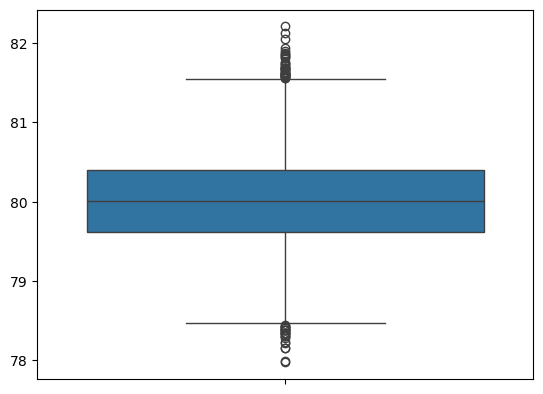

In [8]:
print(f'Observed Sample Mean: {sample.mean()}')
sns.boxplot(sample_means);

In [9]:
sample_means.max()

np.float64(82.20746332836913)

In [10]:
(sample_means >= sample.mean()).mean()

np.float64(0.0)

It looks pretty rare that we'd get a sample mean as large as the one we observed.

Let's look at the 2.5th and 97.5th percentile to see where the middle 95% of sample means land.

We'll also check to see if our sample mean falls within this middle 95%. The cutoff that we choose is known as the **confidence level** for our confidence interval.

In [11]:
print((np.quantile(sample_means, q=0.025), np.quantile(sample_means, q=0.975)))
print(f'Observed Sample Mean: {sample.mean()}')
print(f'Sample Mean in the middle 95%: {np.quantile(sample_means, q=0.025) < sample.mean() < np.quantile(sample_means, q=0.975)}')

(np.float64(78.886607955764), np.float64(81.10587249106531))
Observed Sample Mean: 82.64833333333334
Sample Mean in the middle 95%: False


Based it this, it looks very rare that a sample from a population with mean 80 would end up with our observed sample mean. Less that 5% of samples would end up with a sample mean as far away from the population as the sample mean that we observed.

What about 81?

In [12]:
mu = 81
num_sims = 10000
sample_size = len(sample)
sample_means = norm.rvs(loc=mu, scale=sigma, size=(num_sims,sample_size)).mean(axis=1)
print((np.quantile(sample_means, q=0.025), np.quantile(sample_means, q=0.975)))
print(f'Observed Sample Mean: {sample.mean()}')
print(f'Sample Mean in the middle 95%: {np.quantile(sample_means, q=0.025) < sample.mean() < np.quantile(sample_means, q=0.975)}')

(np.float64(79.89680478181391), np.float64(82.10722248374387))
Observed Sample Mean: 82.64833333333334
Sample Mean in the middle 95%: False


Again, it looks unlikely that our sample came from a distribution with mean of 81.

What about 82?

In [13]:
mu = 82
num_sims = 10000
sample_size = len(sample)
sample_means = norm.rvs(loc=mu, scale=sigma, size=(num_sims,sample_size)).mean(axis=1)
print((np.quantile(sample_means, q=0.025), np.quantile(sample_means, q=0.975)))
print(f'Observed Sample Mean: {sample.mean()}')
print(f'Sample Mean in the middle 95%: {np.quantile(sample_means, q=0.025) < sample.mean() < np.quantile(sample_means, q=0.975)}')

(np.float64(80.88638637189997), np.float64(83.10222380245769))
Observed Sample Mean: 82.64833333333334
Sample Mean in the middle 95%: True


Based on this, our sample mean wouldn't be all that unusual from a population mean mean of 82.

What other population means seem plausible?

Look back at the above simulations and notice that the variability in the sample means doesn't seem to be changing. It looks like the intervals we get are all about 1.1 below mu and 1.1 above mu.

Using this information, we can work backwards to see which values of mu will work: adding and subtracting 1.1 from the sample mean will put us on the edge of plausibility.

In [14]:
sample.mean() - 1.1, sample.mean() + 1.1

(np.float64(81.54833333333335), np.float64(83.74833333333333))

In [15]:
mu = sample.mean() - 1.1
print(mu)
num_sims = 10000
sample_size = len(sample)
sample_means = norm.rvs(loc=mu, scale=sigma, size=(num_sims,sample_size)).mean(axis=1)
print((np.quantile(sample_means, q=0.025), np.quantile(sample_means, q=0.975)))
print(f'Observed Sample Mean: {sample.mean()}')
print(f'Sample Mean in the middle 95%: {np.quantile(sample_means, q=0.025) < sample.mean() < np.quantile(sample_means, q=0.975)}')

81.54833333333335
(np.float64(80.43795393183045), np.float64(82.64590409682893))
Observed Sample Mean: 82.64833333333334
Sample Mean in the middle 95%: False


In [16]:
mu = sample.mean() + 1.1
print(mu)
num_sims = 10000
sample_size = len(sample)
sample_means = norm.rvs(loc=mu, scale=sigma, size=(num_sims,sample_size)).mean(axis=1)
print((np.quantile(sample_means, q=0.025), np.quantile(sample_means, q=0.975)))
print(f'Observed Sample Mean: {sample.mean()}')
print(f'Sample Mean in the middle 95%: {np.quantile(sample_means, q=0.025) < sample.mean() < np.quantile(sample_means, q=0.975)}')

83.74833333333333
(np.float64(82.66959451820053), np.float64(84.87505164433))
Observed Sample Mean: 82.64833333333334
Sample Mean in the middle 95%: False


Or, another way would be to work backwards and generate samples from a distribution whose mean is equal to the sample mean:

In [17]:
mu = sample.mean()
num_sims = 10000
sample_size = len(sample)
sample_means = norm.rvs(loc=mu, scale=sigma, size=(num_sims,sample_size)).mean(axis=1)
print((np.quantile(sample_means, q=0.025), np.quantile(sample_means, q=0.975)))

(np.float64(81.55199010142694), np.float64(83.73342324744705))


So, we have elimiated all values for the population mean where fewer than 5% of samples would have a sample mean as extreme as our observed sample mean. 

We can say that we are 95% confident that the population mean is in the interval calculated above.

### The Bootstrap

We can even do this another way - rather than generate new samples from a normal distribution, we could just generate new samples from our existing sample. This approach is called the **percentile bootstrap**.

To generate new samples from our existing sample, we can use the np.random.choice function which lets us sample from a given set.

In [18]:
num_sims = 10000
resample_means = np.random.choice(sample, size=(num_sims, len(sample)), replace=True).mean(axis=1)
print((np.quantile(resample_means, q=0.025), np.quantile(resample_means, q=0.975)))

(np.float64(81.57032500000001), np.float64(83.76673333333333))


Note that we started by assuming that our data came from a normal distribution, but we can actually relax this assumption when using the bootstrap.

In general, to use the percentile bootstrap for a 95% confidence interval, use the following procedure:

1. Generate a large number of resamples, each of the same size as your original dataset.
2. Calculate the statistic of interest for each resample.
3. Find the 2.5th and 97.5th percentile of the sample statistics. These form the bounds of your confidence interval.

Note that you can adjust the percentiles that you use to get a different level of confidence.

## Analytical Approach

The bootstrap approach has gained popularity due to the availability of computers to quickly generate resamples. More traditionally, an analytical approach has been used to construct confidence intervals.

**Question:** If I generate samples of size 25 from a population which follows a normal distribution with mean of 80 and standard deviation of 5, what does the distribution of these sample means look like?

Note: the distribution of sample means is known as the **sampling distribution of the mean**.

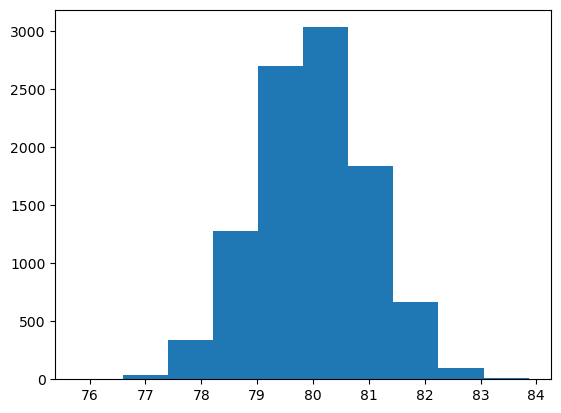

In [19]:
mu = 80
sigma = 5
num_sims = 10000
sample_size = 25
sample_means = norm.rvs(loc=mu, scale=sigma, size=(num_sims,sample_size)).mean(axis=1)
plt.hist(sample_means);

This kind of looks like a normal distribution. Let's check it against a qq-plot.

In [20]:
from scipy.stats import probplot

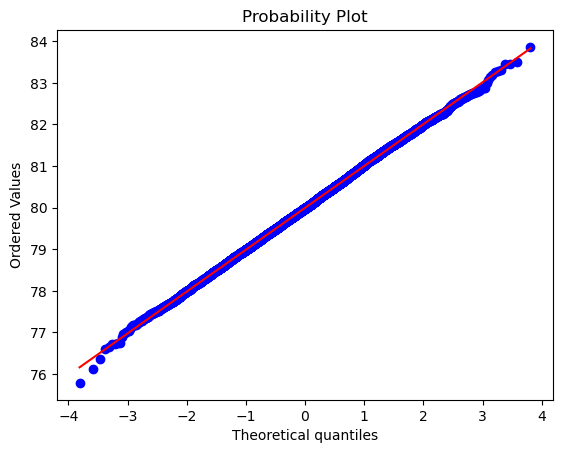

In [21]:
probplot(sample_means, plot=plt);

Adjust the population parameters and the sample size and see if you can figure out the pattern.

In [22]:
mu = 80
sigma = 5
sample_size = 25
sample_means = norm.rvs(loc=mu, scale=sigma, size=(num_sims,sample_size)).mean(axis=1)

print(f'Population mean: {mu}')
print(f'Mean of sample means: {sample_means.mean()}')
print('--------------')
print(f'Population standard deviation: {sigma}')
print(f'Standard deviation of sample means: {sample_means.std()}')

Population mean: 80
Mean of sample means: 80.00471651985461
--------------
Population standard deviation: 5
Standard deviation of sample means: 1.0036436971478573


**Fact:** If X follows a normal distribution with mean $\mu$ and standard deviation $\sigma$, then the distribution of sample means for samples of size $n$ is normal with a mean of $\mu$ and standard deviation of $\frac{\sigma}{\sqrt{n}}$.

Hence, $\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$ follows a **standard normal** distribution.

Note: This says that on average, the sample means will be the same as the population mean. Also, the variability in sample means shrinks as the sample size grows, so the error in your sample means is likely to be smaller as the sample size increases.

**Cool Fact:** If X follows any distribution, not just a normal distribution, under mild conditions (finite expected value and variance), $\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$ follows a **standard normal** distribution. This is known as the **Central Limit Theorem**.

### Constructing a Confidence Interval Using the Sampling Distribution

Knowing the fact about the distribution of sample means allows us to construct a confidence interval for the population mean.

If I can find the 2.5th and 97.5th percentiles of the standard normal distribution, $z_{0.025}$ and $z_{0.975}$, then I can say that for 95% of samples,

$$z_{0.025} \leq \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} \leq z_{0.975}$$

But, due to the symmetry of the normal distribution, $z_{0.025} = -z_{0.975}$.

$$-z_{0.975} \cdot \frac{\sigma}{\sqrt{n}} \leq \bar{x} - \mu \leq z_{0.975} \cdot \frac{\sigma}{\sqrt{n}}$$

$$-\bar{x} - z_{0.975} \cdot \frac{\sigma}{\sqrt{n}} \leq -\mu \leq -\bar{x} + z_{0.975} \cdot \frac{\sigma}{\sqrt{n}}$$

$$\bar{x} + z_{0.975} \cdot \frac{\sigma}{\sqrt{n}} \geq \mu \geq \bar{x} - z_{0.975} \cdot \frac{\sigma}{\sqrt{n}}$$

So, for 95% of samples,

$$\bar{x} - z_{0.975} \cdot \frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{x} + z_{0.975} \cdot \frac{\sigma}{\sqrt{n}}$$

### Population Variance Unknown - The t-Distribution

But, what if we don't know the population standard deviation? Can we just sub the sample standard deviation?

We were using the fact that $\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$ follows a **standard normal** distribution.

Is it true that $\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$ also follows a **standard normal** distribution? Let's check it with a simulation.

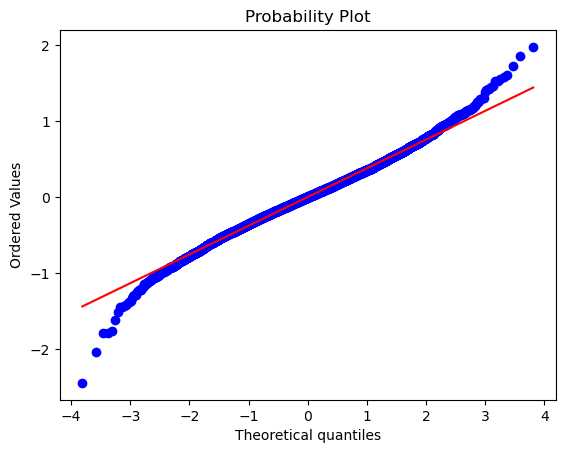

In [23]:
mu = 80
sigma = 5
sample_size = 10

samples = norm.rvs(loc=mu, scale=sigma, size=(num_sims,sample_size))
sample_means = samples.mean(axis=1)
sample_stds = samples.std(axis=1)

sample_ts = (sample_means - mu) / sample_stds

probplot(sample_ts, plot=plt);

It looks like the tails are a little bit too heavy. That is, there are too may extreme values.

**Fact:** If X follows a normal distribution with mean $\mu$ and standard deviation $\sigma$, then the distribution of $\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$ follows a [**t-distribution** with $n-1$ **degrees of freedom**](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

The t-distribution is similar to the standard normal distribution, being symmetric around 0 and bell-shaped, but extreme values are more likely from a t-distribution than a standard normal distribution.

We can import the t-distribution from scipy stats. See what happens if you adjust the degrees of freedom parameter.

In [24]:
from scipy.stats import t

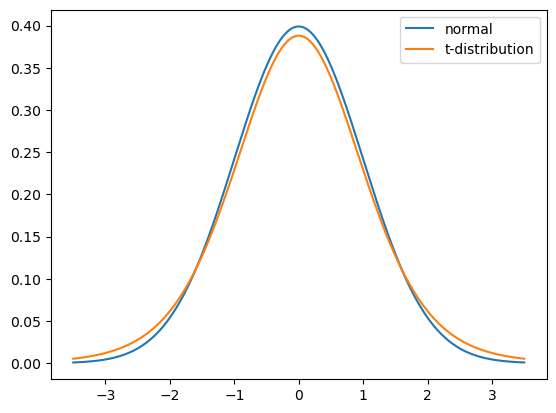

In [25]:
df = 9

x = np.linspace(start=-3.5, stop=3.5, num=1000)
norm_pdf = norm.pdf(x)
t_pdf = t.pdf(x, df=df)

plt.plot(x, norm_pdf, label='normal')
plt.plot(x, t_pdf, label='t-distribution')
plt.legend();

We can verify that our sample means do appear to follow the $t$-distribution.

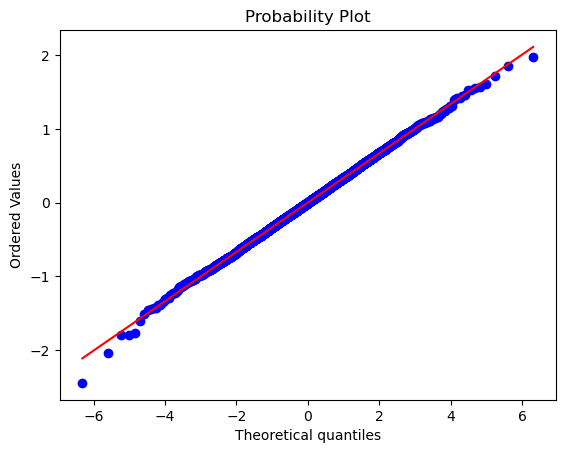

In [26]:
probplot(sample_ts, plot=plt, dist = t, sparams = (sample_size-1));

Using the same reasoning as above, if $t_{0.975}$ is the 97.5th percentile for the $t$-distribution, then for 95% of samples,

$$\bar{x} - t_{0.975} \cdot \frac{s}{\sqrt{n}} \leq \mu \leq \bar{x} + t_{0.975} \cdot \frac{s}{\sqrt{n}}$$

**Note:** For samples of size 30 and up, the t-distribution is very close to the standard normal, so it is normally okay to use either the standard normal or the t-distribution.

Let's apply this formula to our sample from above.

In [27]:
x_bar = sample.mean()
print(f'Sample Mean: {x_bar}')

s = sample.std()
print(f'Sample Standard Deviation: {s}')

n = len(sample)
print(f'Sample Size: {n}')

Sample Mean: 82.64833333333334
Sample Standard Deviation: 3.0878126922179425
Sample Size: 30


To find the percentile, we need to use the t.ppf function.

In [28]:
t_val = t.ppf(0.975, df = n-1)
t_val

np.float64(2.045229642132703)

In [29]:
ci = (x_bar - t_val * s / np.sqrt(n), x_bar + t_val * s / np.sqrt(n))
ci

(np.float64(81.49532512489961), np.float64(83.80134154176707))